## **WARNING**: This exercise is currently not working. This is a work in progress. Please check back later.

# Prediction of index using ARIMA

This notebook shows how to use ARIMA to predict the index of a time series. 

Author: Martin Erpicum

## Importing the libraries

In [1]:
!pip3 install statsmodels
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import datetime as dt

In [2]:

df = pd.read_csv('./index_df.csv', sep=';')

df['valid_since'] = pd.to_datetime(df['valid_since'], format='%d/%m/%Y')
df.index = df['valid_since']
df['index'] = df['index'].str.replace(',', '.').astype(float)
df.head()

# split train and test
train = df.iloc[:-12]
test = df.iloc[-12:]

In [3]:
arima_model = ARIMA(df['index'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 125.364
Date:                Mon, 28 Nov 2022   AIC                           -244.728
Time:                        09:33:30   BIC                           -239.515
Sample:                             0   HQIC                          -242.817
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9979      0.009    108.338      0.000       0.980       1.016
ma.L1         -0.8472      0.080    -10.613      0.000      -1.004      -0.691
sigma2         0.0001   1.46e-05      9.544      0.0

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

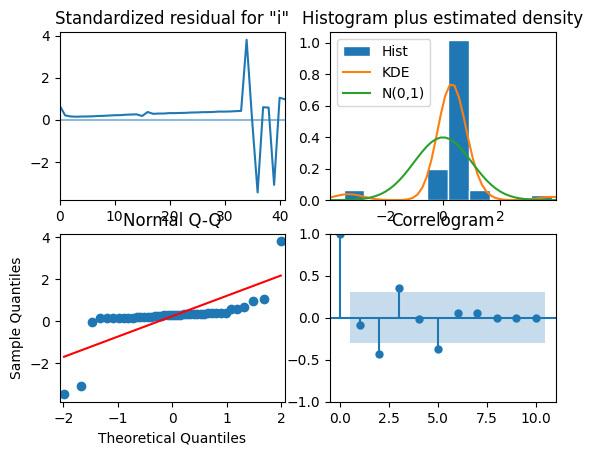

In [4]:
# plot arima model fit
arima_model_fit.plot_diagnostics()
plt.show()


In [5]:

fig = make_subplots()
fig.add_trace(px.line(df, x='valid_since', y='index', title='Indexation').data[0])
fig.add_trace(px.line(df, x='valid_since', y=arima_model_fit.fittedvalues, title='Indexation').data[0])

# change color of trace 
fig.data[1].line.color = 'red'
# add name 
fig.data[1].name = 'ARIMA model fit'
# dashed line
fig.data[1].line.dash = 'dash'

# add legend
fig.update_layout(showlegend=True, legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

# define width of figure
fig.update_layout(width=500)



fig.show()

In [6]:
# forecast for next 5 years every 6 months
forecast = arima_model_fit.get_forecast(steps=100)
forecast_df = forecast.summary_frame(alpha=0.05)
# add date to forecast
forecast_df.head()

# add 6 months to last date
last_date = df.index[-1] + dt.timedelta(days=30)

# change index to datetime for each month after last date
forecast_df.index = pd.date_range(start=last_date, periods=100, freq='12M')

forecast_df

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



index,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-08-31,2.286486,0.011803,2.263352,2.309620
2024-08-31,2.320799,0.017994,2.285531,2.356067
2025-08-31,2.355039,0.023657,2.308673,2.401405
2026-08-31,2.389206,0.029206,2.331962,2.446449
2027-08-31,2.423299,0.034786,2.355120,2.491479
...,...,...,...,...
2118-08-31,5.240027,0.992421,3.294918,7.185137
2119-08-31,5.268041,1.006269,3.295790,7.240291
2120-08-31,5.295994,1.020166,3.296506,7.295483
2121-08-31,5.323888,1.034112,3.297066,7.350711


In [7]:


# plot forecast
fig = make_subplots(rows=1, cols=1)
fig.add_trace(px.line(df, x='valid_since', y='index', title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(df, x='valid_since', y=arima_model_fit.fittedvalues, title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(forecast_df, x=forecast_df.index, y='mean', title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(forecast_df, x=forecast_df.index, y='mean_ci_lower', title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(forecast_df, x=forecast_df.index, y='mean_ci_upper', title='Indexation').data[0], row=1, col=1)

# change color of trace
# change color of trace 
fig.data[1].line.color = 'red'
# add name 
fig.data[1].name = 'ARIMA model fit'
# dashed line
fig.data[1].line.dash = 'dash'

# change color of trace
fig.data[2].line.color = 'green'
fig.data[3].line.color = 'grey'
fig.data[4].line.color = 'purple'

# add legend
fig.update_layout(showlegend=True, title='Indexation forecast')

fig.show()

In [8]:
# show data of prediction
forecast_df

index,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-08-31,2.286486,0.011803,2.263352,2.309620
2024-08-31,2.320799,0.017994,2.285531,2.356067
2025-08-31,2.355039,0.023657,2.308673,2.401405
2026-08-31,2.389206,0.029206,2.331962,2.446449
2027-08-31,2.423299,0.034786,2.355120,2.491479
...,...,...,...,...
2118-08-31,5.240027,0.992421,3.294918,7.185137
2119-08-31,5.268041,1.006269,3.295790,7.240291
2120-08-31,5.295994,1.020166,3.296506,7.295483
2121-08-31,5.323888,1.034112,3.297066,7.350711


In [9]:
# add column to df
df['coefficient'] = 1

# drop rank
df = df.drop(columns=['rank'])
df = df.drop(columns=['valid_since'])

forecast_to_combine_df = forecast_df.copy()

# add coefficient to forecast based on the prediction of arima
forecast_to_combine_df['coefficient'] = forecast_to_combine_df['mean'] / forecast_to_combine_df['mean'].iloc[0]

forecast_to_combine_df['coefficient'] = round(1 / forecast_to_combine_df['coefficient'], 2)

forecast_to_combine_df['index'] = round(forecast_to_combine_df['mean'], 4)
forecast_to_combine_df = forecast_to_combine_df.drop(columns=['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper'])

# combine data of prediction with original data
df = pd.concat([df, forecast_to_combine_df], axis=0)

# name to index
df.index.name = 'valid_since'

# append a new row at the beginning of the dataframe
# df = df.append({'valid_since': '1950-01-01', 'index': 1, 'coefficient': 1})

# valid_since,index,coefficient
# 1950-01-01,0.20,1.0
# 1955-01-01,0.23,1.0
# 1960-01-01,0.27,1.0
# 1970-01-01,0.33,1.0
# 1975-01-01,0.50,1.0
# 1980-01-01,0.67,1.0
# 1985-06-01,0.83,1.0

# append a new row at the beginning of the csv file

new_df = pd.DataFrame({
    'valid_since': ['1950-01-01', '1955-01-01', '1960-01-01', '1970-01-01', '1975-01-01', '1980-01-01', '1985-06-01'], 
    'index': [0.20, 0.23, 0.27, 0.33, 0.50, 0.67, 0.83], 
    'coefficient': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
    })

new_df.index = pd.to_datetime(new_df['valid_since'], format='%Y-%m-%d')

new_df.drop(columns=['valid_since'], inplace=True)

# combine new_df with df
df = pd.concat([new_df, df], axis=0)

df.to_csv('./index_df_with_prediction.csv')

df


,index,coefficient
valid_since,,
1950-01-01,0.2000,1.00
1955-01-01,0.2300,1.00
1960-01-01,0.2700,1.00
1970-01-01,0.3300,1.00
1975-01-01,0.5000,1.00
...,...,...
2118-08-31,5.2400,0.44
2119-08-31,5.2680,0.43
2120-08-31,5.2960,0.43
